<a href="https://colab.research.google.com/github/Saket22-CS/Saket-Infosys-Nov24/blob/main/FutureCart_Infosys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis and Data Preprocessing for Sales Data
## Project Overview
This project involves performing Exploratory Data Analysis (EDA) and data preprocessing on sales data. Our goal is to clean and prepare the data, identify trends and patterns, and gain insights through visualizations. This analysis will include handling missing values, identifying and treating outliers, and understanding correlations between different variables.

## Objectives:
- Ensure the sales data is in a time series format.
- Clean and format the data, addressing missing values and outliers.
- Visualize data distributions and trends over time.
- Identify relationships between variables through correlation analysis.
- Summarize the data with key statistical metrics.

## Key Steps in This Notebook:
1. Basic Data Checks
2. Handling Missing Values
3. Outlier Detection and Treatment (using 97th percentile)
4. Feature Engineering (time-based features)
5. Data Visualization (including distribution plots, time series plots, and pie charts)
6. Correlation Analysis
7. Statistical Summaries


In [2]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization styles
plt.style.use('ggplot')
sns.set_palette('viridis')



## Basic Data Checks
Before starting any analysis, it's essential to conduct basic checks to understand the structure of the data and ensure it's suitable for further processing.


In [3]:
# Loading the data from Excel files into DataFrames
sales_data = pd.read_excel('/content/ProductA.xlsx')  # Load sales data
google_clicks = pd.read_excel('/content/ProductA_google_clicks.xlsx')  # Load Google clicks data
fb_impressions = pd.read_excel('/content/ProductA_fb_impressions.xlsx')  # Load Facebook impressions data



In [4]:
# Displaying basic information about the structure of each dataset
print("Sales Data Overview:")
sales_data.info()  # Shows data types, non-null counts, and memory usage


Sales Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Day Index  212 non-null    datetime64[ns]
 1   Quantity   212 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [5]:
print("\nGoogle Clicks Data Overview:")
google_clicks.info()  # Provides the same details for the Google clicks dataset



Google Clicks Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Day Index  212 non-null    datetime64[ns]
 1   Clicks     212 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [6]:
print("\nFacebook Impressions Data Overview:")
fb_impressions.info()  # Provides the same details for the Facebook impressions dataset



Facebook Impressions Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [7]:
print("\nPreview of Sales Data:")
display(sales_data.head())  # Use `head()` to get a quick look at the first few rows of the dataset



Preview of Sales Data:


,Day Index,Quantity
0,2021-12-01,14
1,2021-12-02,10
2,2021-12-03,13
3,2021-12-04,22
4,2021-12-05,33


In [8]:
# Checking the summary statistics of the sales data for any anomalies or data type issues
print("\nSales Data Summary:")
display(sales_data.describe())


Sales Data Summary:


,Day Index,Quantity
count,212,212.000000
mean,2022-03-16 12:00:00,17.542453
min,2021-12-01 00:00:00,5.000000
25%,2022-01-22 18:00:00,13.750000
50%,2022-03-16 12:00:00,17.000000
75%,2022-05-08 06:00:00,21.000000
max,2022-06-30 00:00:00,38.000000
std,NaN,5.790423


In [9]:
# Merging datasets on the 'Date' column
merged_data = pd.merge(sales_data, google_clicks, on='Day Index', how='outer')
merged_data = pd.merge(merged_data, fb_impressions, on='Day Index', how='outer')

# Sorting by Date to ensure a time series format
merged_data.sort_values('Day Index', inplace=True)

# Displaying the merged dataset
print("Merged Data:")
display(merged_data.head())

Merged Data:


,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678


In [10]:
#info of dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Quantity     212 non-null    int64         
 2   Clicks       212 non-null    int64         
 3   Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.8 KB


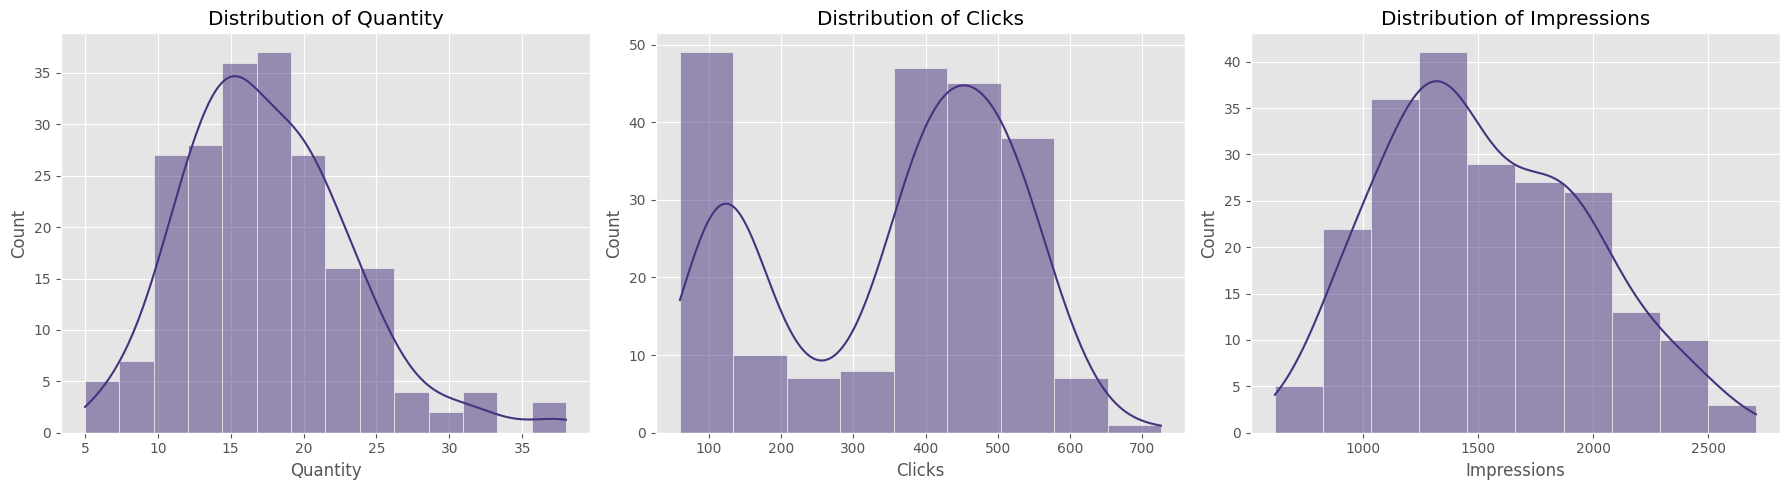

In [11]:
# Plotting distribution plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(merged_data['Quantity'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Quantity')
axes[0].set_xlabel('Quantity')

sns.histplot(merged_data['Clicks'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Clicks')
axes[1].set_xlabel('Clicks')

sns.histplot(merged_data['Impressions'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Impressions')
axes[2].set_xlabel('Impressions')

plt.tight_layout()
plt.show()

### Explanation of Graphs:
- **Quantity Distribution**: Shows how sales quantities are spread and helps identify the most common sales values.
- **Clicks Distribution**: Highlights how many clicks are typically observed and the spread of data.
- **Impressions Distribution**: Indicates how often the product is shown in ads.


## Daily Trends of Quantity, Clicks, and Impressions
### Objective:
Visualizing daily trends for sales quantity, clicks, and impressions helps to understand how these metrics vary over time. This comparison can reveal potential correlations or patterns between user engagement (clicks and impressions) and sales performance (quantity).

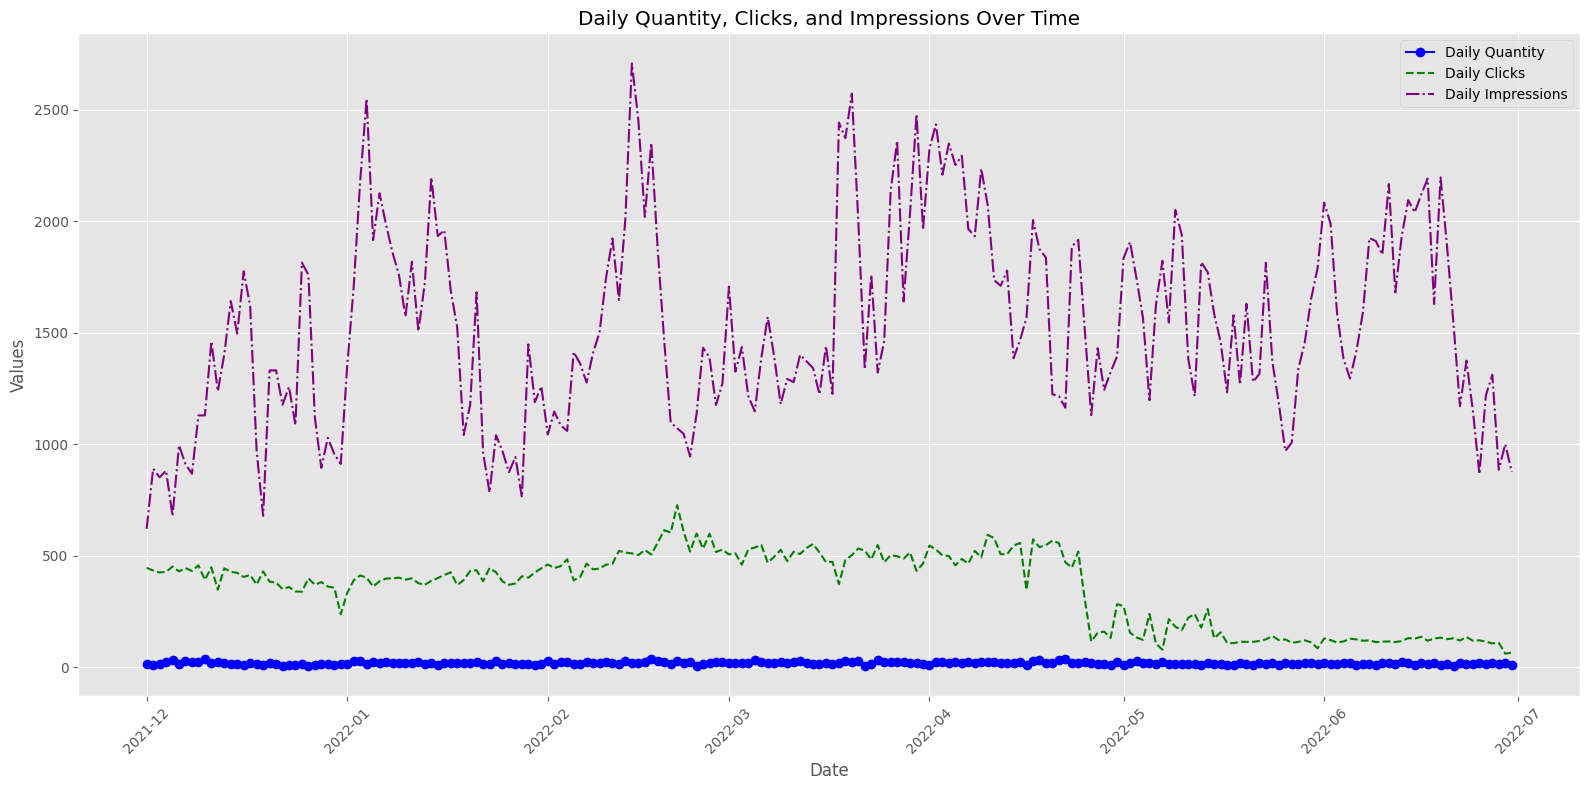

In [12]:
# Plotting daily clicks, daily impressions, and daily quantity over time
plt.figure(figsize=(16, 8))

# Plot for daily quantity
plt.plot(merged_data['Day Index'], merged_data['Quantity'], label='Daily Quantity', marker='o', color='blue')

# Plot for daily clicks
plt.plot(merged_data['Day Index'], merged_data['Clicks'], label='Daily Clicks', linestyle='--', color='green')

# Plot for daily impressions
plt.plot(merged_data['Day Index'], merged_data['Impressions'], label='Daily Impressions', linestyle='-.', color='purple')

# Adding plot details
plt.title('Daily Quantity, Clicks, and Impressions Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

# Display the plot
plt.show()


### Explanation:
- **Daily Quantity**: Represents the number of products sold each day.
- **Daily Clicks**: Shows the number of user interactions (clicks) on the product each day, which can be a proxy for customer interest.
- **Daily Impressions**: Indicates how many times the product was displayed in ads or search results each day, providing insights into ad reach and visibility.


## Monthly Trends of Quantity, Clicks, and Impressions
### Objective:
Analyzing monthly aggregated trends for quantity, clicks, and impressions helps identify macro-level patterns and seasonal variations in user engagement and sales performance.


In [13]:
# Ensure 'Date' is in datetime format before extracting 'Month'
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'], errors='coerce')

# Adding the 'Month' column to the DataFrame
merged_data['Month'] = merged_data['Day Index'].dt.month

# Checking if the 'Month' column was added successfully
print("Preview of Merged Data with Month Column:")
display(merged_data.head())

Preview of Merged Data with Month Column:


,Day Index,Quantity,Clicks,Impressions,Month
0,2021-12-01,14,445,620,12
1,2021-12-02,10,433,890,12
2,2021-12-03,13,424,851,12
3,2021-12-04,22,427,881,12
4,2021-12-05,33,451,678,12


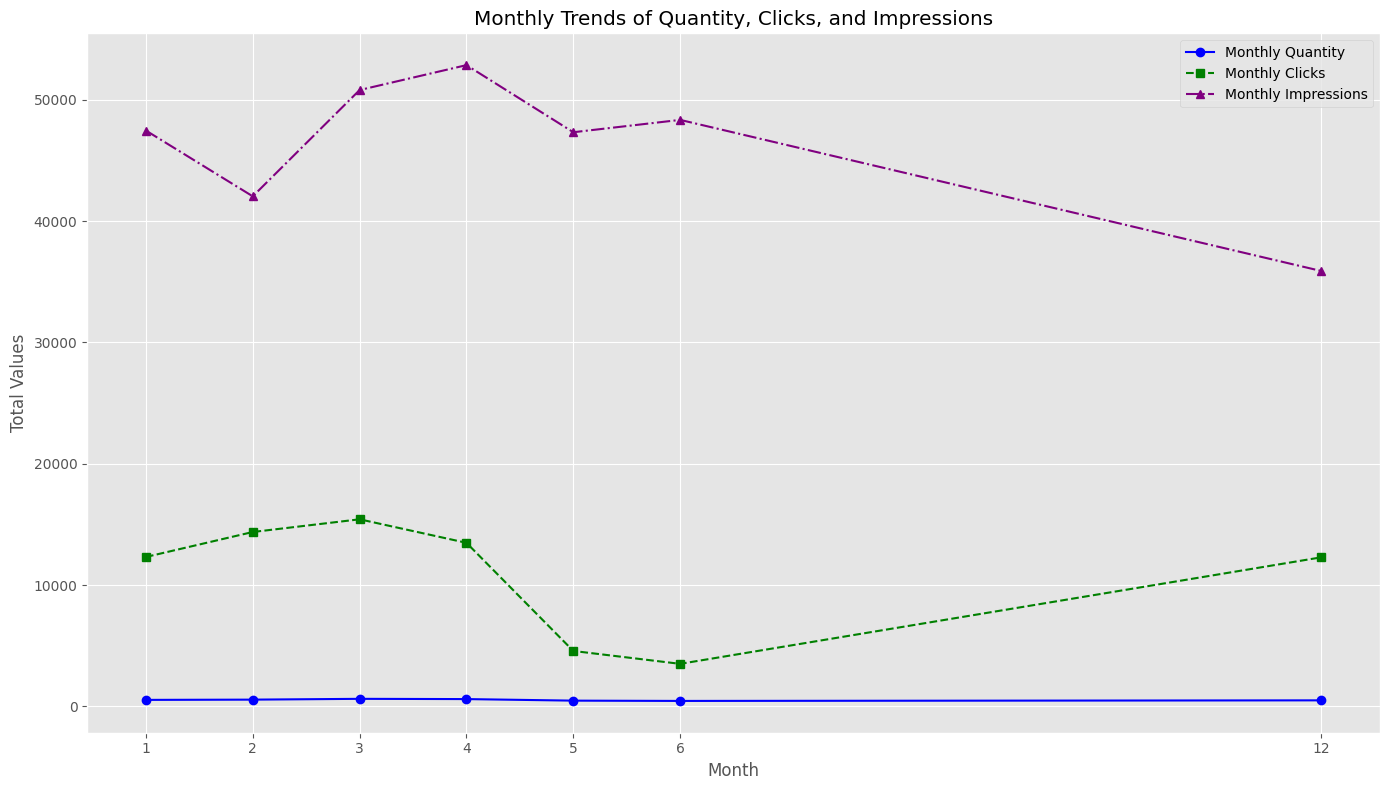

In [14]:
# Ensure 'Month' column exists in the DataFrame
merged_data['Month'] = merged_data['Day Index'].dt.month

# Grouping data by 'Month' and summing only relevant numeric columns
monthly_data = merged_data.groupby('Month')[['Quantity', 'Clicks', 'Impressions']].sum()

# Plotting monthly quantity, clicks, and impressions
plt.figure(figsize=(14, 8))

# Plot for monthly quantity
plt.plot(monthly_data.index, monthly_data['Quantity'], label='Monthly Quantity', marker='o', color='blue')

# Plot for monthly clicks
plt.plot(monthly_data.index, monthly_data['Clicks'], label='Monthly Clicks', marker='s', linestyle='--', color='green')

# Plot for monthly impressions
plt.plot(monthly_data.index, monthly_data['Impressions'], label='Monthly Impressions', marker='^', linestyle='-.', color='purple')

# Adding plot details
plt.title('Monthly Trends of Quantity, Clicks, and Impressions')
plt.xlabel('Month')
plt.ylabel('Total Values')
plt.legend()
plt.xticks(monthly_data.index)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


### Explanation:
- **Monthly Quantity**: Summarizes the total number of products sold each month, providing insights into sales cycles and peak periods.
- **Monthly Clicks**: Shows the total user interactions (clicks) per month, helping assess customer interest trends over time.
- **Monthly Impressions**: Represents the total number of times the product was displayed in ads or search results per month, indicating ad reach and effectiveness.


## Handling Missing Values
Missing values can skew results and lead to biased analyses. We'll identify and handle missing values using appropriate imputation techniques.


In [15]:
# Checking for missing values in the datasets
print("\nMissing Values in Sales Data:")
print(sales_data.isnull().sum())
print("\nMissing Values in Google Clicks Data:")
print(google_clicks.isnull().sum())
print("\nMissing Values in Facebook Impressions Data:")
print(fb_impressions.isnull().sum())

# Handling missing values by filling them with the mean of their respective columns
sales_data.fillna(sales_data.mean(), inplace=True)
google_clicks.fillna(google_clicks.mean(), inplace=True)
fb_impressions.fillna(fb_impressions.mean(), inplace=True)



Missing Values in Sales Data:
Day Index    0
Quantity     0
dtype: int64

Missing Values in Google Clicks Data:
Day Index    0
Clicks       0
dtype: int64

Missing Values in Facebook Impressions Data:
Day Index      0
Impressions    0
dtype: int64


## Box Plots for Clicks, Quantity, and Impressions Data
### Objective:
Box plots are used to visualize the distribution of data, detect outliers, and understand the spread and skewness of the dataset. This helps identify variability and potential anomalies in the data.


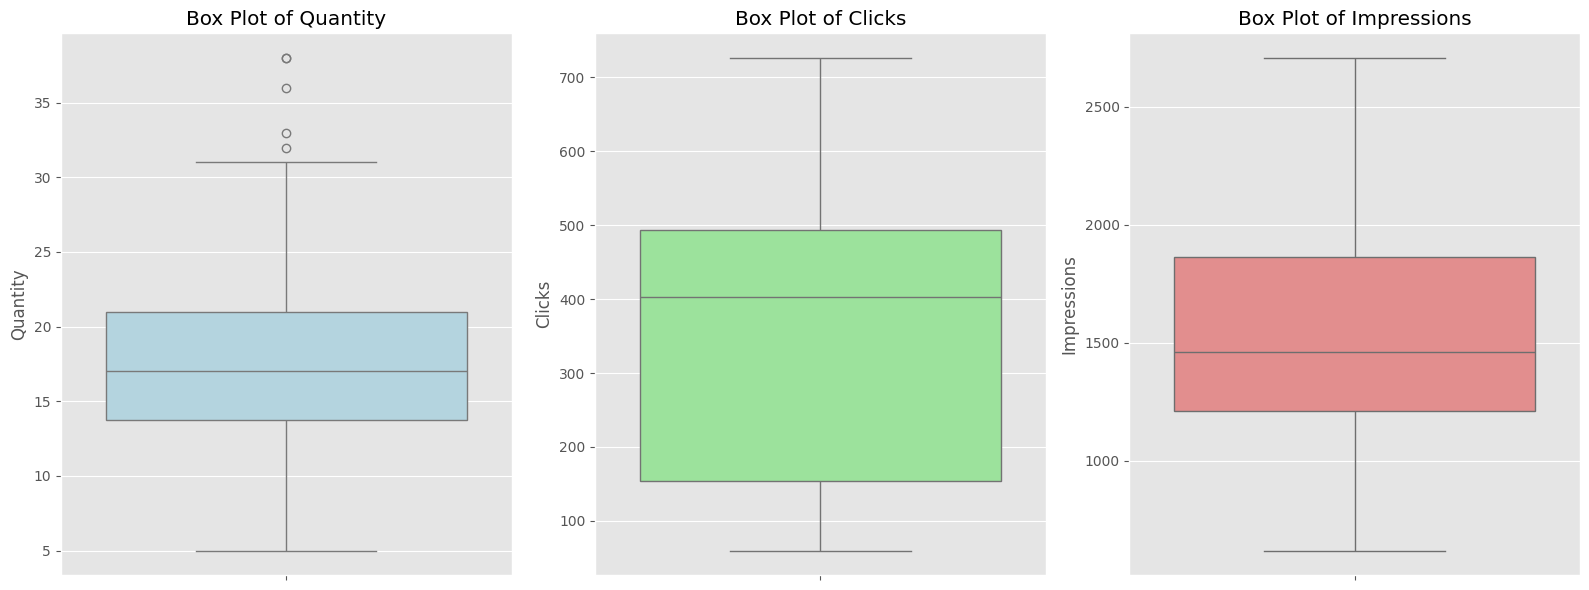

In [17]:
# Setting up the figure size for box plots
plt.figure(figsize=(16, 6))

# Plotting box plot for Quantity data
plt.subplot(1, 3, 1)
sns.boxplot(data=merged_data, y='Quantity', color='lightblue')
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')

# Plotting box plot for Clicks data
plt.subplot(1, 3, 2)
sns.boxplot(data=merged_data, y='Clicks', color='lightgreen')
plt.title('Box Plot of Clicks')
plt.ylabel('Clicks')

# Plotting box plot for Impressions data
plt.subplot(1, 3, 3)
sns.boxplot(data=merged_data, y='Impressions', color='lightcoral')
plt.title('Box Plot of Impressions')
plt.ylabel('Impressions')

# Adjusting layout
plt.tight_layout()
plt.show()



### Explanation:
- **Quantity Box Plot**: Visualizes the distribution of sales quantity data, highlighting the median, quartiles, and outliers.
- **Clicks Box Plot**: Shows how user interaction data (clicks) is spread and identifies any extreme values.
- **Impressions Box Plot**: Illustrates the distribution of the number of times the product was shown in ads, along with potential outliers.


##  Outlier Detection and Treatment
Outliers can distort the analysis. We use the interquartile range (IQR) method to detect outliers and replace them with the 97th percentile value.


In [25]:
# Function to count the number of outliers in a column using the Interquartile Range (IQR) method
def count_outliers(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1               # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers below the lower bound or above the upper bound
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Selecting numeric columns for outlier analysis in the merged data
numeric_columns = merged_data[['Quantity', 'Clicks', 'Impressions']]
outlier_counts = numeric_columns.apply(count_outliers)

# Displaying the number of outliers in each column
print("Number of outliers in each column:")
print(outlier_counts)


Number of outliers in each column:
Quantity       0
Clicks         0
Impressions    0
dtype: int64


In [29]:
# Function to replace outliers using the 25th and 97th percentiles
def replace_outliers_with_percentiles(column):
    q25 = np.percentile(column, 25)  # 25th percentile
    q75 = np.percentile(column, 75)  # 75th percentile
    q97 = np.percentile(column, 97)  # 97th percentile

    # Define IQR and bounds for outlier detection
    IQR = q75 - q25
    lower_bound = q25 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = q75 + 1.5 * IQR  # Upper bound for outliers

    # Replace outliers above the upper bound with the 97th percentile value
    column = column.apply(lambda x: q97 if x > upper_bound else x)
    # Replace outliers below the lower bound with the 25th percentile value
    column = column.apply(lambda x: q25 if x < lower_bound else x)

    return column

# Applying the function to 'Quantity', 'Clicks', and 'Impressions' columns in merged_data
merged_data['Quantity'] = replace_outliers_with_percentiles(merged_data['Quantity'])
merged_data['Clicks'] = replace_outliers_with_percentiles(merged_data['Clicks'])
merged_data['Impressions'] = replace_outliers_with_percentiles(merged_data['Impressions'])

# Displaying a preview of the updated DataFrame
print("Updated Merged DataFrame preview after outlier treatment:")
print(merged_data.head())


Updated Merged DataFrame preview after outlier treatment:
   Day Index  Quantity  Clicks  Impressions  Month
0 2021-12-01     14.00     445          620     12
1 2021-12-02     10.00     433          890     12
2 2021-12-03     13.00     424          851     12
3 2021-12-04     22.00     427          881     12
4 2021-12-05     30.67     451          678     12


## Histograms Before and After Outlier Treatment
### Objective:
Visualizing histograms before and after outlier treatment helps us understand the impact of outliers on the data distribution and how the treatment has adjusted the data.


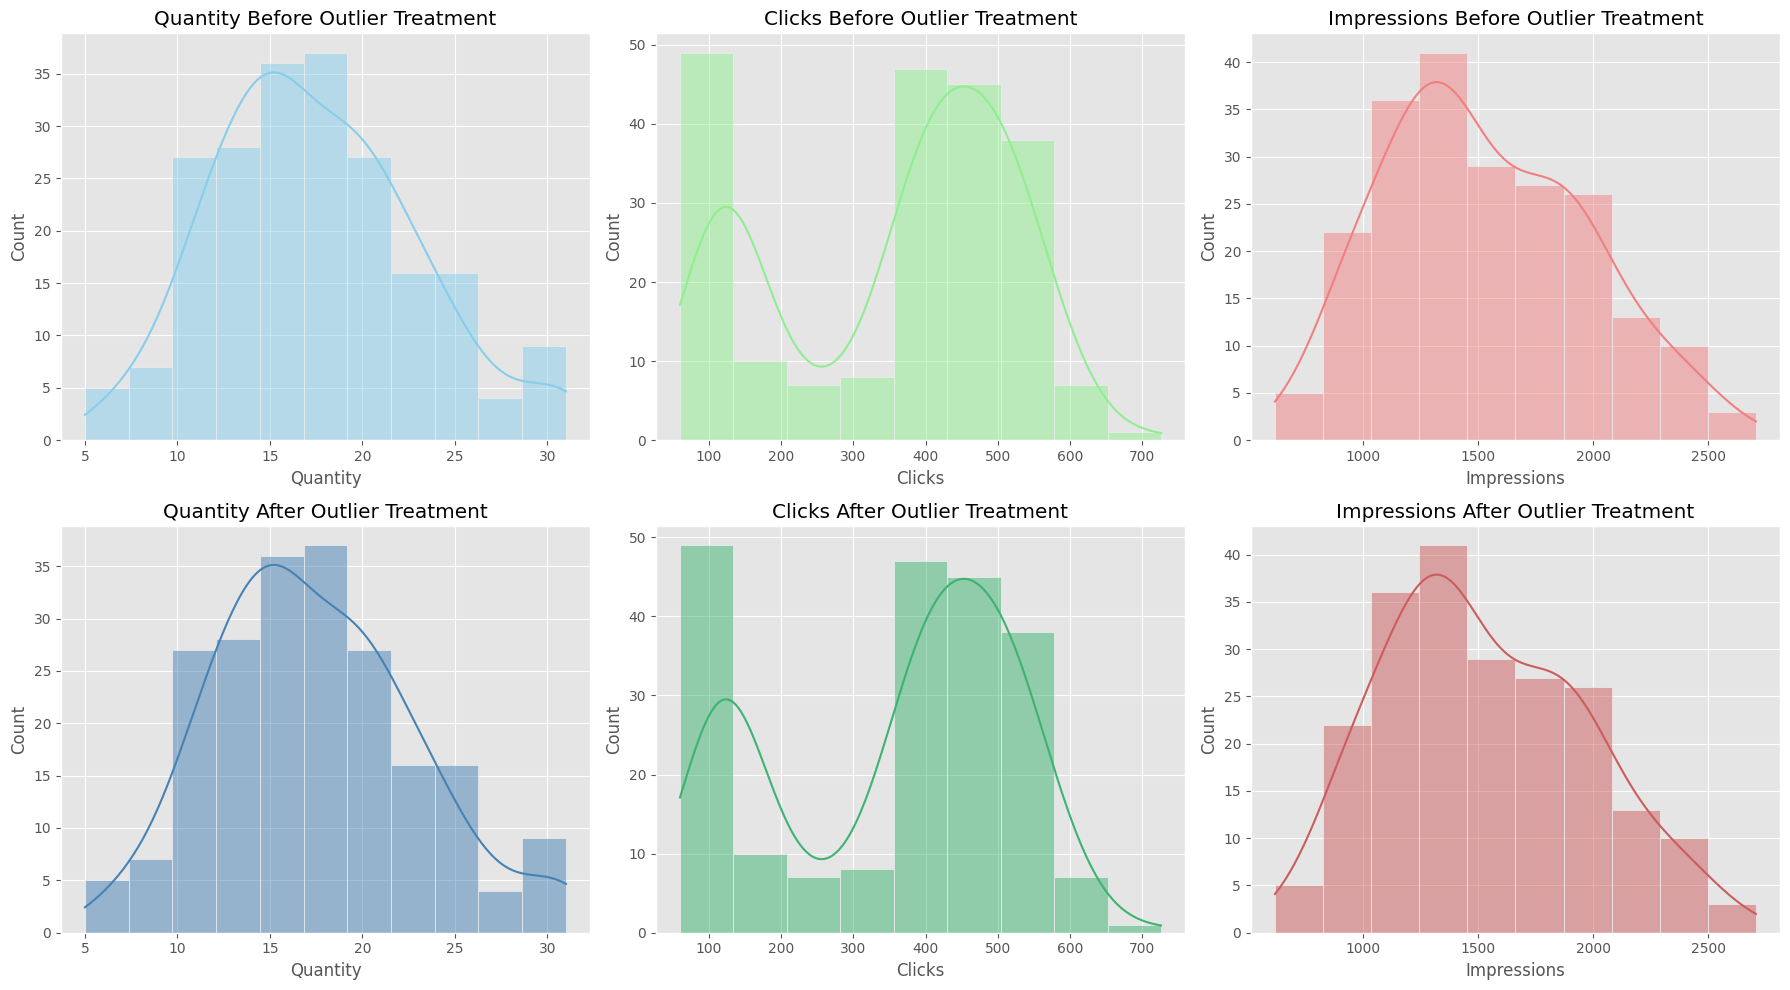

In [30]:
# Copy of the original data for comparison
original_data = merged_data.copy()

# Applying outlier treatment (as previously defined) to each column
merged_data['Quantity'] = replace_outliers_with_percentiles(merged_data['Quantity'])
merged_data['Clicks'] = replace_outliers_with_percentiles(merged_data['Clicks'])
merged_data['Impressions'] = replace_outliers_with_percentiles(merged_data['Impressions'])

# Setting up the figure for before and after histograms
plt.figure(figsize=(18, 10))

# Plotting histograms before outlier treatment
plt.subplot(2, 3, 1)
sns.histplot(original_data['Quantity'], kde=True, color='skyblue')
plt.title('Quantity Before Outlier Treatment')
plt.xlabel('Quantity')

plt.subplot(2, 3, 2)
sns.histplot(original_data['Clicks'], kde=True, color='lightgreen')
plt.title('Clicks Before Outlier Treatment')
plt.xlabel('Clicks')

plt.subplot(2, 3, 3)
sns.histplot(original_data['Impressions'], kde=True, color='lightcoral')
plt.title('Impressions Before Outlier Treatment')
plt.xlabel('Impressions')

# Plotting histograms after outlier treatment
plt.subplot(2, 3, 4)
sns.histplot(merged_data['Quantity'], kde=True, color='steelblue')
plt.title('Quantity After Outlier Treatment')
plt.xlabel('Quantity')

plt.subplot(2, 3, 5)
sns.histplot(merged_data['Clicks'], kde=True, color='mediumseagreen')
plt.title('Clicks After Outlier Treatment')
plt.xlabel('Clicks')

plt.subplot(2, 3, 6)
sns.histplot(merged_data['Impressions'], kde=True, color='indianred')
plt.title('Impressions After Outlier Treatment')
plt.xlabel('Impressions')

# Adjusting layout
plt.tight_layout()
plt.show()



### Explanation:
- **Before Outlier Treatment**:
  - The initial histograms show the original distribution of the `Quantity`, `Clicks`, and `Impressions` data.
  - Outliers can be observed as extreme points, often causing skewness or long tails in the distribution.

- **After Outlier Treatment**:
  - The histograms display the distribution after replacing extreme outliers using the 97th and 25th percentiles.
  - The new distributions should have reduced skewness and fewer extreme values, leading to a more balanced data spread.


##  Feature Engineering
To enhance our analysis, we will create new time-based features like week, day, month, and quarter to better understand temporal patterns.


In [31]:
# Converting 'Date' columns to datetime format
sales_data['Day Index'] = pd.to_datetime(sales_data['Day Index'], errors='coerce')
google_clicks['Day Index'] = pd.to_datetime(google_clicks['Day Index'], errors='coerce')
fb_impressions['Day Index'] = pd.to_datetime(fb_impressions['Day Index'], errors='coerce')

# Merging the datasets on 'Date'
merged_data = pd.merge(sales_data, google_clicks, on='Day Index', how='outer')
merged_data = pd.merge(merged_data, fb_impressions, on='Day Index', how='outer')
merged_data.sort_values('Day Index', inplace=True)

# Adding new time-based features
merged_data['Week'] = merged_data['Day Index'].dt.isocalendar().week
merged_data['Day'] = merged_data['Day Index'].dt.day
merged_data['Month'] = merged_data['Day Index'].dt.month
merged_data['Quarter'] = merged_data['Day Index'].dt.quarter

# Displaying a preview of the data with new features
print("Merged Data with Time-Based Features:")
display(merged_data.head())


Merged Data with Time-Based Features:


,Day Index,Quantity,Clicks,Impressions,Week,Day,Month,Quarter
0,2021-12-01,14.00,445,620,48,1,12,4
1,2021-12-02,10.00,433,890,48,2,12,4
2,2021-12-03,13.00,424,851,48,3,12,4
3,2021-12-04,22.00,427,881,48,4,12,4
4,2021-12-05,30.67,451,678,48,5,12,4


### Explanation:
- **Feature Engineering**: We created features for `Week`, `Day`, `Month`, and `Quarter` to enable time-based analysis and enhance predictive modeling.


##  Data Visualization
### a. Sales Quantity Over Time
We will plot the sales quantity over time to identify any trends or seasonality.


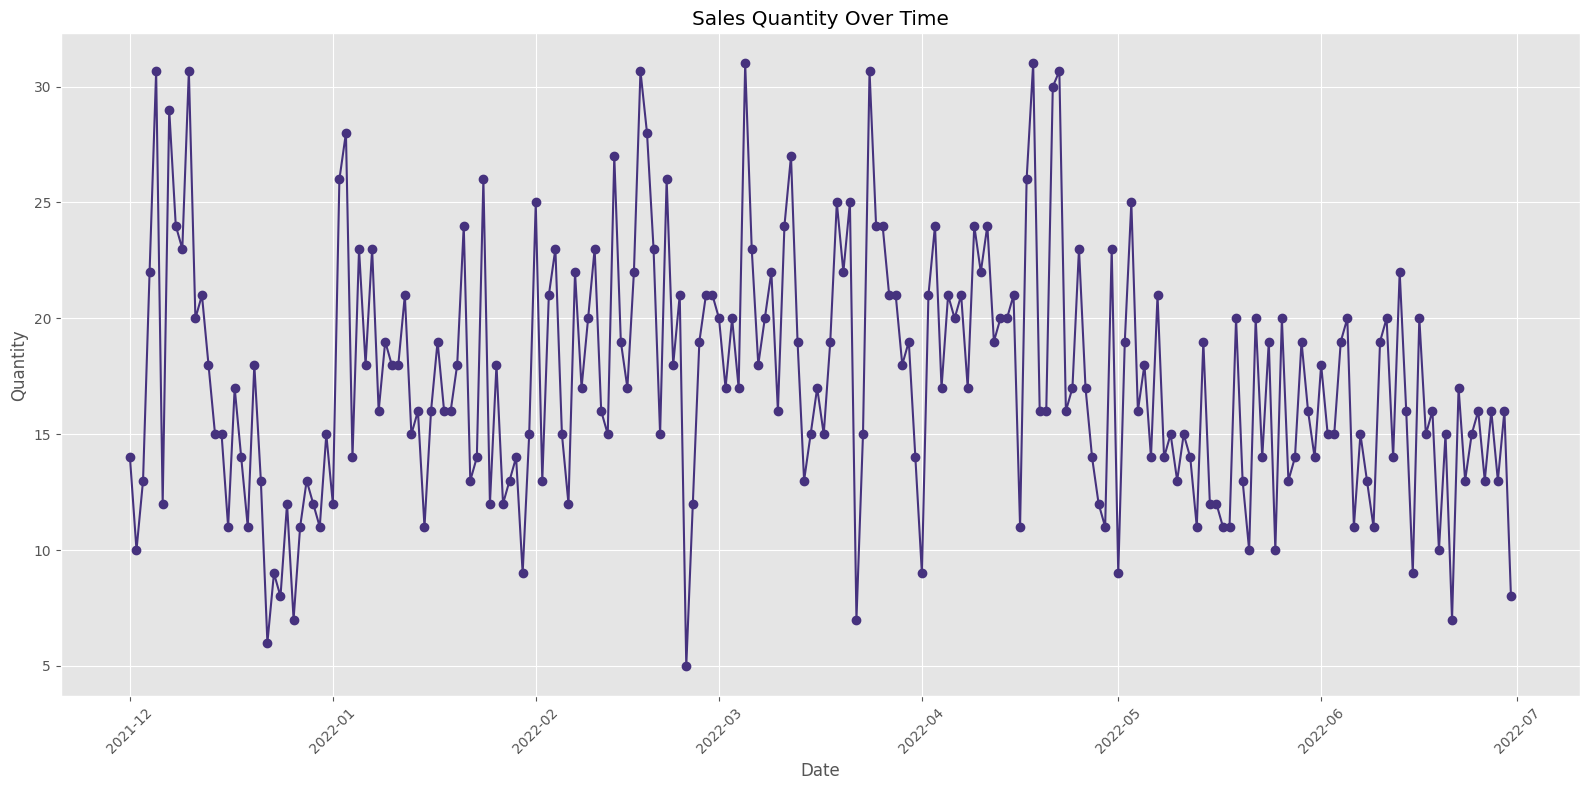

In [32]:
# Plotting the time series of sales quantity
plt.figure(figsize=(16, 8))
plt.plot(merged_data['Day Index'], merged_data['Quantity'], label='Quantity', marker='o')
plt.title('Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Explanation:
- **Time Series Plot**: Visualizes trends, seasonal patterns, and potential anomalies in the sales data.


## b. Sales Distribution by Month, Day, Week, and Quarter
### Objective:
These visualizations help in understanding the distribution of sales across different time periods. Pie charts provide a clear and quick overview of how sales quantities are spread throughout months, days, weeks, and quarters, aiding in identifying peak sales periods.




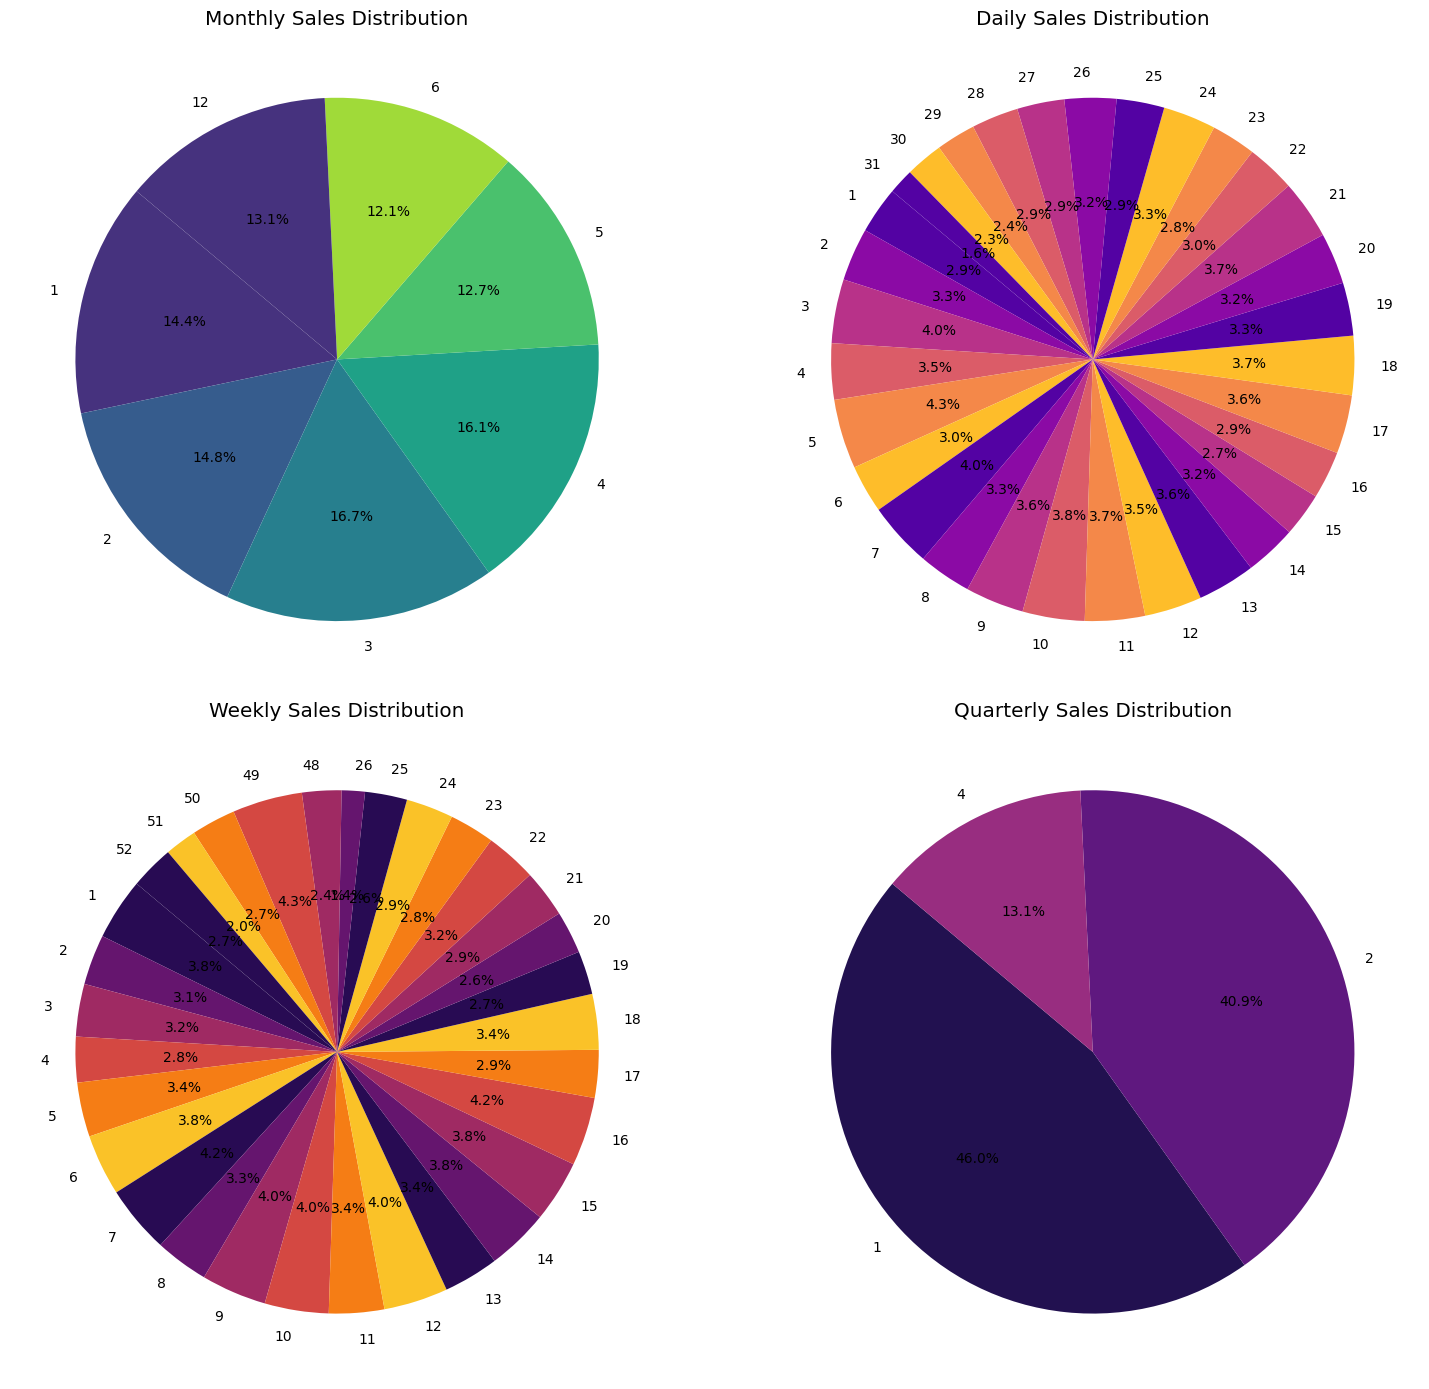

In [33]:
# Grouping data by Month, Day, Week, and Quarter and calculating total sales
monthly_sales = merged_data.groupby('Month')['Quantity'].sum()
daily_sales = merged_data.groupby('Day')['Quantity'].sum()
weekly_sales = merged_data.groupby('Week')['Quantity'].sum()
quarterly_sales = merged_data.groupby('Quarter')['Quantity'].sum()

# Plotting pie charts for each time-based sales distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Monthly Sales Distribution
axes[0, 0].pie(monthly_sales, labels=monthly_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
axes[0, 0].set_title('Monthly Sales Distribution')

# Daily Sales Distribution
axes[0, 1].pie(daily_sales, labels=daily_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma'))
axes[0, 1].set_title('Daily Sales Distribution')

# Weekly Sales Distribution
axes[1, 0].pie(weekly_sales, labels=weekly_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('inferno'))
axes[1, 0].set_title('Weekly Sales Distribution')

# Quarterly Sales Distribution
axes[1, 1].pie(quarterly_sales, labels=quarterly_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma'))
axes[1, 1].set_title('Quarterly Sales Distribution')

# Adjusting layout for better display
plt.tight_layout()
plt.show()


### Explanation of the Pie Charts:
- **Monthly Sales Distribution**: Visualizes how total sales are distributed across each month of the year. This can help identify seasonality and high-demand months.
- **Daily Sales Distribution**: Shows which days of the month contribute most to total sales, helping pinpoint specific high or low sales days.
- **Weekly Sales Distribution**: Provides insights into which weeks of the year see higher sales volumes, useful for understanding weekly patterns or anomalies.
- **Quarterly Sales Distribution**: Highlights which quarters contribute most to overall sales, assisting in strategic planning and quarterly performance reviews.

### c. Correlation Analysis
Understanding how features are related can provide insights into potential predictors for future models.


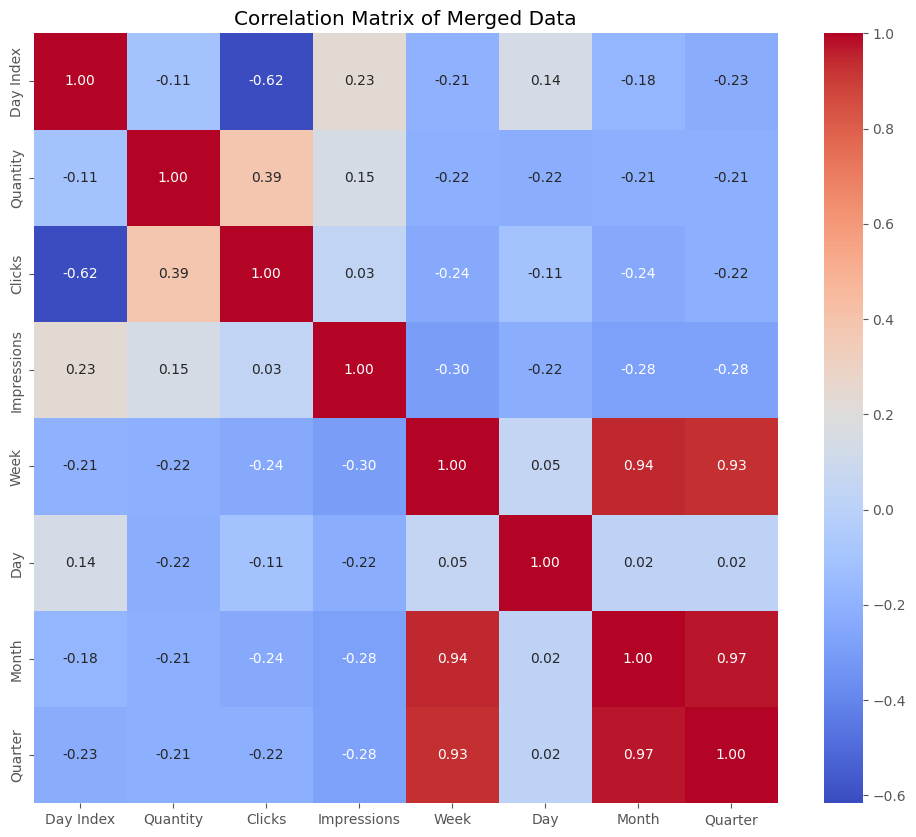

In [34]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = merged_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Merged Data')
plt.show()


### Explanation:
- **Correlation Heatmap**: Highlights the relationships between variables, which helps identify potential predictive features.


## Statistical Summaries
Summarizing the data provides key metrics for a better understanding of central tendencies and variability.


In [35]:
# Displaying the final statistical summary
print("Final Statistical Summary of Merged Data:")
display(merged_data.describe())


Final Statistical Summary of Merged Data:


,Day Index,Quantity,Clicks,Impressions,Week,Day,Month,Quarter
count,212,212.000000,212.00000,212.000000,212.0,212.000000,212.000000,212.000000
mean,2022-03-16 12:00:00,17.430896,358.20283,1531.702830,19.023585,15.660377,4.750000,1.867925
min,2021-12-01 00:00:00,5.000000,60.00000,620.000000,1.0,1.000000,1.000000,1.000000
25%,2022-01-22 18:00:00,13.750000,154.00000,1209.750000,8.0,8.000000,2.000000,1.000000
50%,2022-03-16 12:00:00,17.000000,402.50000,1460.000000,16.0,16.000000,4.000000,2.000000
75%,2022-05-08 06:00:00,21.000000,492.75000,1862.000000,23.0,23.000000,6.000000,2.000000
max,2022-06-30 00:00:00,31.000000,726.00000,2707.000000,52.0,31.000000,12.000000,4.000000
std,NaN,5.467691,164.52160,440.660783,15.022713,8.788065,3.399017,0.998344


## Conclusion
This comprehensive EDA and feature engineering process prepared the data for advanced predictive modeling. Key insights were drawn from the data through visualizations and detailed analysis. This notebook sets the stage for developing forecasting models to predict future sales trends.
